# Reducción de dimensionalidad / PCA 2 (Core)
Descripción
PCA 2 (Core)

Visualización de Datos con Componentes Principales

Descripción:

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris



Objetivo:

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.



Instrucciones:

1. Carga de datos:
- Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
- Asegúrate de que los datos no contengan valores nulos o atípicos.

2. Exploración y preprocesamiento de datos:
- Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
- Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

3. Aplicación de PCA:
- Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
- Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

4. Visualización de los componentes principales:
- Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
- Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

5. Interpretación de los resultados:
- Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
- Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

Análisis de Resultados:

- Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
- Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

Conclusión:

- Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Iris.csv')
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [3]:
print(df.duplicated().sum())

0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
#Veré los outliers si es que tengo
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Distribución de SepalLengthCm', 
    'Distribución de SepalWidthCm', 
    'Distribución de PetalLengthCm', 
    'Distribución de PetalWidthCm'))

fig.add_trace(go.Box(y=df['SepalLengthCm'], name='SepalLengthCm'), row=1, col=1)
fig.add_trace(go.Box(y=df['SepalWidthCm'], name='SepalWidthCm'), row=1, col=2)
fig.add_trace(go.Box(y=df['PetalLengthCm'], name='PetalLengthCm'), row=2, col=1)
fig.add_trace(go.Box(y=df['PetalWidthCm'], name='PetalWidthCm'), row=2, col=2)


fig.update_layout(
    title='Distribución de Variables del Dataset',
    showlegend=False,  # Oculta la leyenda para gráficos de caja
    height=600,  # Altura del gráfico
    width=800   # Ancho del gráfico
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Los datos se ven bien
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Iris.csv')

#Selecciono la variable objetivo y la separo
X = df.drop(['Species', 'Id'], axis = 1)
y = df['Species'] #Esta sería mi columna objetivo

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [11]:
from sklearn.decomposition import PCA

# Reduzco a dos dimensiones
pipeline_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])

X_pca = pipeline_pca.fit_transform(X)

pca_model = pipeline_pca.named_steps['pca']
explained_variance = pca_model.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Varianza explicada por el PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el PC2: {explained_variance[1]:.2f}")
print(f"Varianza total explicada por los dos primeros componentes: {total_explained_variance:.2f}")



Varianza explicada por el PC1: 0.73
Varianza explicada por el PC2: 0.23
Varianza total explicada por los dos primeros componentes: 0.96


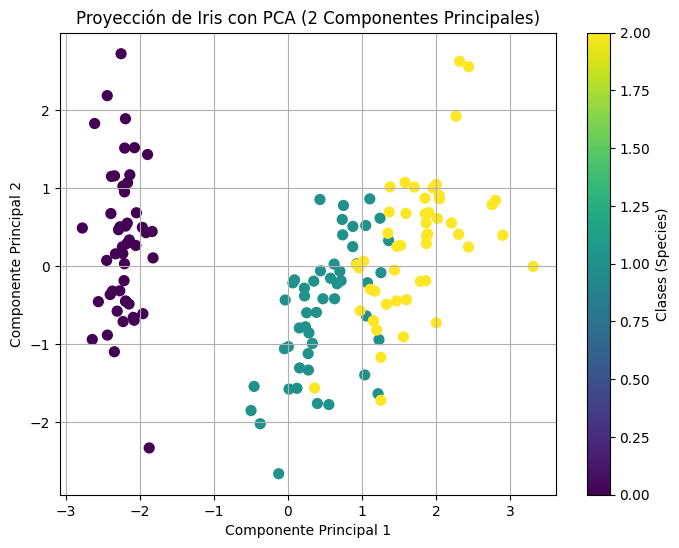

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.factorize()[0], cmap='viridis', s=50)
plt.colorbar(label='Clases (Species)')
plt.title("Proyección de Iris con PCA (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


In [13]:
pca_model = pipeline_pca.named_steps['pca']
components = pca_model.components_
columns = X.columns

# Mostrar las cargas de cada característica en los dos primeros componentes principales
pca_coefficients = pd.DataFrame(components, columns=columns, index=['PC1', 'PC2'])
print(pca_coefficients)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416


In [14]:
# El PC1 está influido por PetalLenghCm y PetalWidthCm principalmente, sugiere
#que este componente captura variaciones relacionadas con las dimensiones del 
#pétalo.
#El PC3 está dominado por SepalWidthCm, eso dice que este componente captura variaciones
#relacionadas con el ancho del sépalo.
#El análisis muestra que las dimensiones del pétalo son las características más 
#discriminativas en el dataset de iris.